In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

In [11]:
# noiseless data
a = -10
b = 10
x_train = np.random.uniform(a, b, 100)
y_train = np.sin(x_train)
x_test = np.random.uniform(a, b, 100)
y_test = np.sin(x_test)

In [21]:
# Baseline Model
poly = lagrange(x_train, y_train)

# Compute training log MSE
y_hat = Polynomial(poly.coef[::-1])(x_train)
logMSE = np.log((np.square(y_hat - y_train)).mean())
print(f'Model: noiseless data; train log MSE: {logMSE:.4f}')

# Compute testing log MSE
y_hat = Polynomial(poly.coef[::-1])(x_test)
logMSE = np.log((np.square(y_hat - y_test)).mean())
print(f'Model: noiseless data; test log MSE: {logMSE:.4f}')

Model: noiseless data; train log MSE: 173.6459
Model: noiseless data; test log MSE: 173.8380


In [18]:
err = []
for std in range(1,10):
    eps = np.random.normal(0,std,100)
    x_train_noise = x_train+eps
    y_train = np.sin(x_train_noise)
    poly = lagrange(x_train_noise, y_train)
    y_hat = Polynomial(poly.coef[::-1])(x_test)
    logMSE = np.log((np.square(y_hat - y_test)).mean())
    err.append(logMSE)
    print(f'Model: noisy data with epsilon~N(0,{std}); log MSE: {logMSE:.4f}')

Model: noisy data with epsilon~N(0,1); log MSE: 167.5190
Model: noisy data with epsilon~N(0,2); log MSE: 147.5176
Model: noisy data with epsilon~N(0,3); log MSE: 167.9749
Model: noisy data with epsilon~N(0,4); log MSE: 142.7137
Model: noisy data with epsilon~N(0,5); log MSE: 142.4115
Model: noisy data with epsilon~N(0,6); log MSE: 142.5636
Model: noisy data with epsilon~N(0,7); log MSE: 125.1446
Model: noisy data with epsilon~N(0,8); log MSE: 128.4397
Model: noisy data with epsilon~N(0,9); log MSE: 106.0845


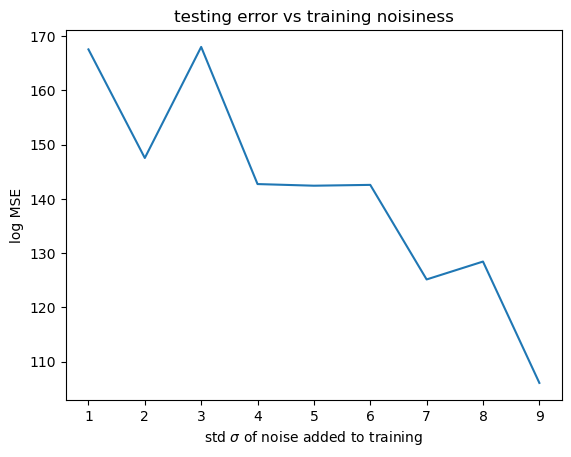

In [20]:
plt.ylabel('log MSE')
plt.xlabel('std $σ$ of noise added to training')
plt.title('testing error vs training noisiness')
plt.plot(range(1,10),err)
plt.show()